# Health Expenditure and Suicide Rates [2000-2019]
### Relation between health expenditure and suicide rates, in 2000/2019, WHO stats.

https://www.kaggle.com/code/fernandoretamales/who-hexpandsuirates/data

In [8]:
import pandas as pd 
import numpy as np
from scipy import stats #for outlier detection based on standard deviations
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#current directory
df_url = "https://raw.githubusercontent.com/erickbezerra/DBexploring/main/Source/WHO_MHExp_and_Deaths.csv"
df = pd.read_csv(df_url) #df = pd.read_csv(df_url, encoding = 'utf-16', sep = '\t', error_bad_lines = False, skiprows = 1, skipfooter = 3, engine = 'python')
df_lines, df_columns = df.shape
pd.set_option("display.max.columns", None) # configure the display.max.columns option to make sure pandas doesn’t hide any columns.
df.head()

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
0,Armenia,2006,3219235.0,54404,78,5.85,3.38,4.99,5.36
1,Armenia,2007,3107395.5,53660,0,5.50,3.38,4.99,5.02
2,Armenia,2008,3234031.0,54824,63,6.64,3.38,4.99,4.23
3,Armenia,2009,3066044.0,55120,53,8.44,3.38,4.99,4.06
4,Armenia,2012,3024127.0,55200,79,9.13,3.38,4.99,6.39


Where:

| VARIABLE | DESCRIPTION |
|---|---|
| Country_Name | Countries | 
| Year | Years |
| Population | Number of Population |
| Deaths_All_Types | Total Deaths |
| Deaths_Suicides | Deaths by suicides according to ICD10 |
| HExp_Pctage_Y | Health Expenditure as % of GDP |
| MHExp_Pctage_2011 | Mental Health Expenditure index in 2011 |
| Dep_Num_2015 | Depression estimate index in 2015 |
| Suicide_p100 | Number of suicides per 100,000 population |

In [10]:
df.describe()

,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
count,531.000000,5.310000e+02,5.310000e+02,531.000000,531.000000,531.000000,531.000000,531.000000
mean,2009.694915,2.535148e+07,4.322763e+05,259.659134,7.555631,5.731205,4.890603,10.832768
std,5.572266,3.285463e+07,5.856799e+05,1075.051391,2.103642,2.952330,0.605882,5.491425
min,2000.000000,2.811540e+05,8.360000e+02,0.000000,1.990000,0.390000,2.900000,0.820000
25%,2005.000000,3.553031e+06,5.733600e+04,0.000000,6.100000,3.860000,4.570000,6.415000
50%,2010.000000,9.696110e+06,1.841500e+05,2.000000,7.900000,5.080000,5.060000,10.240000
75%,2014.000000,3.811594e+07,7.411640e+05,42.500000,9.070000,7.640000,5.190000,14.495000
max,2019.000000,2.101471e+08,2.762186e+06,20031.000000,13.680000,12.910000,5.940000,29.630000


In [11]:
# Check column titles and classes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_Name       531 non-null    object 
 1   Year               531 non-null    int64  
 2   Population         531 non-null    float64
 3   Deaths_All_Types   531 non-null    int64  
 4   Deaths_Suicides    531 non-null    int64  
 5   HExp_Pctage_Y      531 non-null    float64
 6   MHExp_Pctage_2011  531 non-null    float64
 7   Dep_Num_2015       531 non-null    float64
 8   Suicide_p100       531 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 37.5+ KB


In [12]:
# Check for percentage of nulls
df.isnull().sum() /df.shape[0] # sum of all null / number of lines

Country_Name         0.0
Year                 0.0
Population           0.0
Deaths_All_Types     0.0
Deaths_Suicides      0.0
HExp_Pctage_Y        0.0
MHExp_Pctage_2011    0.0
Dep_Num_2015         0.0
Suicide_p100         0.0
dtype: float64

In [13]:
# Check correlation
df.corr()

,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
Year,1.000000,0.030269,0.037489,0.072034,0.116407,-0.127059,-0.026095,-0.241000
Population,0.030269,1.000000,0.963166,0.154111,0.119990,0.049958,-0.291873,-0.095217
Deaths_All_Types,0.037489,0.963166,1.000000,0.133208,0.255325,0.140764,-0.174404,-0.021400
Deaths_Suicides,0.072034,0.154111,0.133208,1.000000,-0.128837,-0.140421,-0.088350,0.037642
HExp_Pctage_Y,0.116407,0.119990,0.255325,-0.128837,1.000000,0.607025,0.396817,0.111000
MHExp_Pctage_2011,-0.127059,0.049958,0.140764,-0.140421,0.607025,1.000000,0.246897,0.237551
Dep_Num_2015,-0.026095,-0.291873,-0.174404,-0.088350,0.396817,0.246897,1.000000,0.212817
Suicide_p100,-0.241000,-0.095217,-0.021400,0.037642,0.111000,0.237551,0.212817,1.000000


<AxesSubplot:>

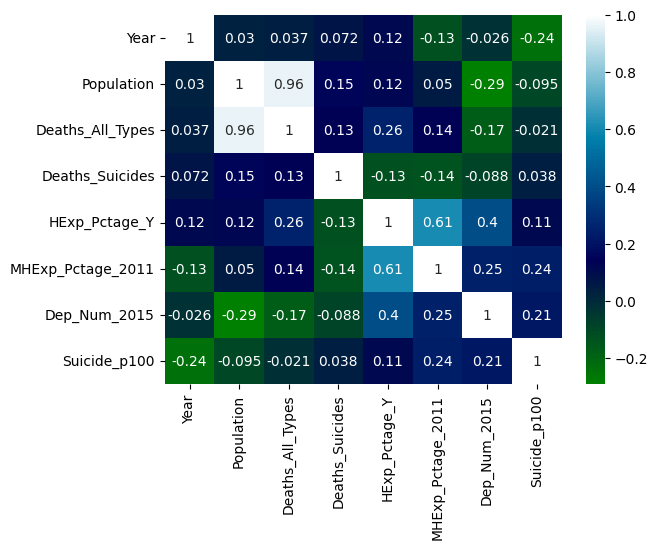

In [14]:
# Check correlation
sns.heatmap(df.corr(),annot = True,cmap="ocean")

In [15]:
# Listing minimu correlation
df.corr().min()

Year                -0.241000
Population          -0.291873
Deaths_All_Types    -0.174404
Deaths_Suicides     -0.140421
HExp_Pctage_Y       -0.128837
MHExp_Pctage_2011   -0.140421
Dep_Num_2015        -0.291873
Suicide_p100        -0.241000
dtype: float64

# Data Cleaning

In [16]:
# Deleting columns having medium corrleation (not so low not so high)
# del df["Deaths_Suicides"]
# del df["HExp_Pctage_Y"]
# del df["MHExp_Pctage_2011"]
# df.head()

# Visualization

In [17]:
# List of unique countries
unique_countries = df[~df.duplicated("Country_Name")]
countries_list = unique_countries["Country_Name"].tolist()

# Print number of lines of list_of_countries (1 column head + 41 countries)
print(f'There\'s {unique_countries.shape[0]-1} unique countries.')



There's 41 unique countries.


In [18]:
# Sum of all deaths
Deaths_All_Types_Total = df.groupby("Country_Name").Deaths_All_Types.sum().reset_index()
Deaths_Suicides_Total = df.groupby("Country_Name").Deaths_Suicides.sum().reset_index()
HExp_Pctage_Y_Average = df.groupby("Country_Name").HExp_Pctage_Y.mean().reset_index()

# Merging data
Compare_Deaths = pd.merge(Deaths_All_Types_Total, Deaths_Suicides_Total, on=["Country_Name", "Country_Name"])

# Creating new column
Compare_Deaths['Deaths_Suicides_(%)'] = Compare_Deaths['Deaths_Suicides'].div(Compare_Deaths['Deaths_All_Types'])*100

# Merging data
Compare_Deaths = pd.merge(Compare_Deaths, HExp_Pctage_Y_Average, on=["Country_Name", "Country_Name"])

Compare_Deaths.head()

,Country_Name,Deaths_All_Types,Deaths_Suicides,Deaths_Suicides_(%),HExp_Pctage_Y
0,Armenia,653358,472,0.072242,8.986667
1,Australia,5511810,35,0.000635,8.550526
2,Azerbaijan,665358,701,0.105357,2.576000
3,Brazil,2699602,3,0.000111,9.590000
4,Bulgaria,3287010,7174,0.218253,7.072667


<AxesSubplot:xlabel='Country_Name', ylabel='Deaths_Suicides_(%)'>

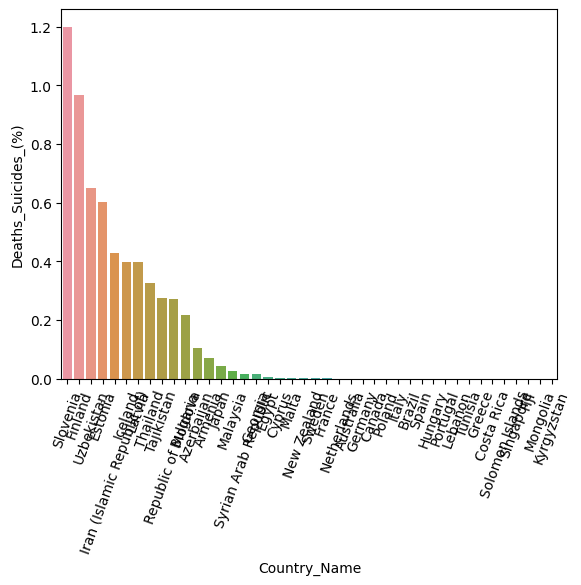

In [19]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=70)
sns.barplot(data=Compare_Deaths.sort_values("Deaths_Suicides_(%)", ascending=False), x="Country_Name", y="Deaths_Suicides_(%)")

<AxesSubplot:xlabel='Country_Name', ylabel='Deaths_Suicides_(%)'>

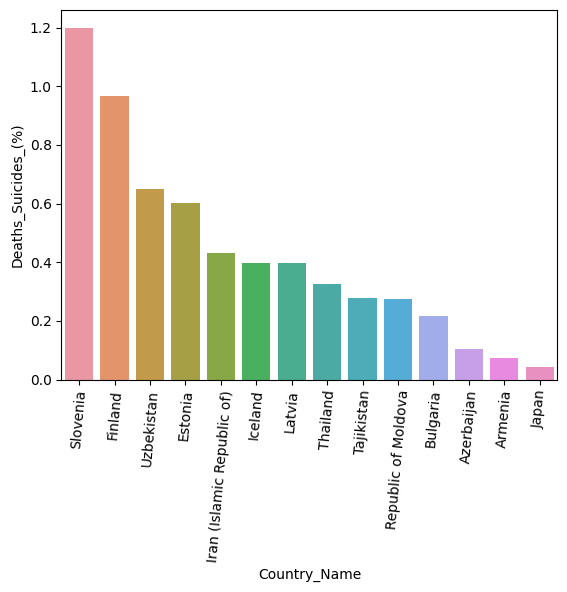

In [20]:
data_selected = Compare_Deaths.loc[Compare_Deaths["Deaths_Suicides_(%)"] >= 0.04]
fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=85)
sns.barplot(data=data_selected.sort_values("Deaths_Suicides_(%)", ascending=False), x="Country_Name", y="Deaths_Suicides_(%)")



<AxesSubplot:xlabel='Country_Name', ylabel='HExp_Pctage_Y'>

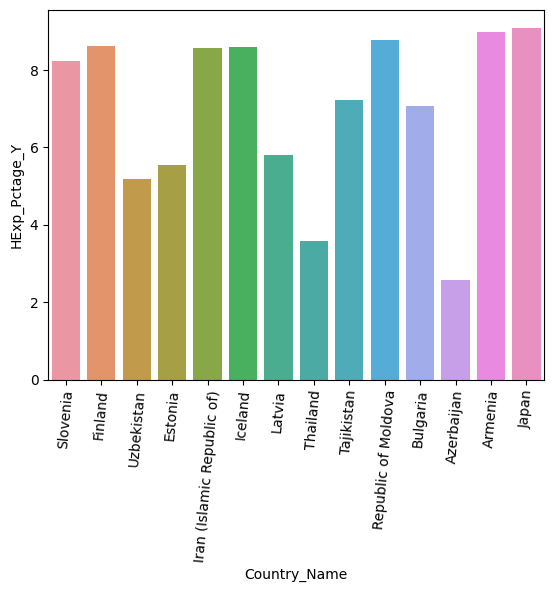

In [21]:
data_selected = Compare_Deaths.loc[Compare_Deaths["Deaths_Suicides_(%)"] >= 0.04]
fig, ax = plt.subplots()
ax.tick_params(axis='x', rotation=85)
sns.barplot(data=data_selected.sort_values("Deaths_Suicides_(%)", ascending=False), x="Country_Name", y="HExp_Pctage_Y")




<AxesSubplot:xlabel='Country_Name', ylabel='HExp_Pctage_Y'>

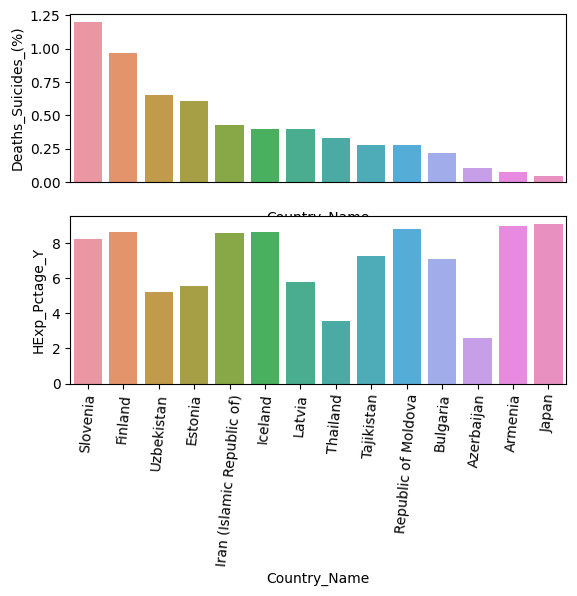

In [22]:
data_selected = Compare_Deaths.loc[Compare_Deaths["Deaths_Suicides_(%)"] >= 0.04]
plt.subplot(2, 1, 1).tick_params(axis='x', colors="w")
sns.barplot(data=data_selected.sort_values("Deaths_Suicides_(%)", ascending=False), x="Country_Name", y="Deaths_Suicides_(%)")
plt.subplot(2, 1, 2).tick_params(axis='x', rotation=85)
sns.barplot(data=data_selected.sort_values("Deaths_Suicides_(%)", ascending=False), x="Country_Name", y="HExp_Pctage_Y")